<a href="https://colab.research.google.com/github/Csar9000/FlowerRecognition/blob/main/flower_recognition_cnn_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подключение к Google диск

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Импорт библиотек и переменных для работы

#### Импорт библиотек

In [ ]:
# Игнор предупреждений
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# визуализация данных
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 

%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#разметка модели
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#подготовка изображений
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#библиотеки модели НН
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical 

# для слоев CNN
from tensorflow.keras.layers import Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
 
import tensorflow as tf
from tensorflow import keras
import random as rn

# для работы с изображениями
import cv2                  
import numpy as np  
from tqdm import tqdm # отслеживание прогресса выполнения

#### Подготовка необходимых переменных

In [ ]:
X=[] # хранилище изображений, как битовых масиивов данных
Z=[] # хранилище названий картинок
IMG_SIZE=150
batch_size=128
epochs=50
FLOWER_DAISY_DIR='/content/drive/MyDrive/flowers1/daisy'
FLOWER_SUNFLOWER_DIR='/content/drive/MyDrive/flowers1/sunflower'
FLOWER_TULIP_DIR='/content/drive/MyDrive/flowers1/tulip'
FLOWER_DANDI_DIR='/content/drive/MyDrive/flowers1/dandelion'
FLOWER_ROSE_DIR='/content/drive/MyDrive/flowers1/rose'

#### Подгрузка изображений

In [ ]:
def assign_label(img,flower_type):
    return flower_type

In [ ]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 764/764 [00:11<00:00, 69.45it/s] 

764


In [ ]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 733/733 [00:12<00:00, 59.66it/s]

1497


In [ ]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:16<00:00, 60.70it/s] 

2481


In [ ]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 1053/1053 [00:17<00:00, 61.56it/s] 

3534


In [ ]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:12<00:00, 65.23it/s] 

4318


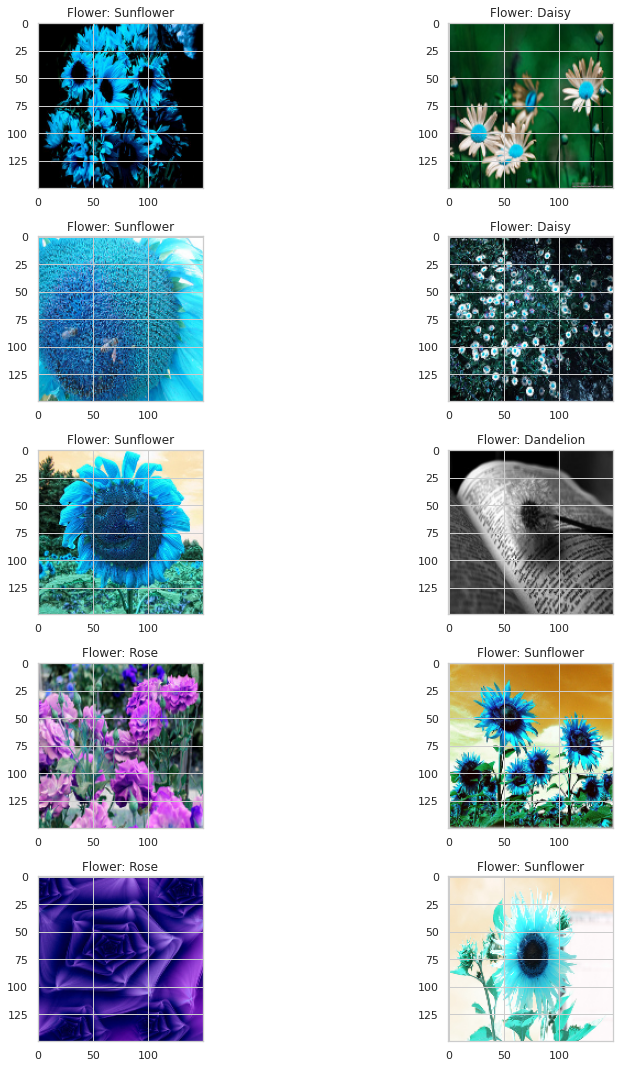

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

#### Перевод категориальных данных в числа

In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

#### Разделение на обучающие и тестирующие данные

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

#### Задание параметров НН

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3))) #Слой 2D свертки
model.add(MaxPooling2D(pool_size=(2,2))) #Операция максимальной подвыборки
#strides: Целое число, кортеж из 2 целых чисел или None. Значения шагов.
#padding: «same» (без учета регистра)

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten()) #конвертации входящих данных в меньшую размерность
model.add(Dense(256))#слой получает информацию со всех узлов предыдущего слоя;
                     #units: положительное целое число, размерность выходного пространства.
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

#### Предобработка изображений

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2,
        horizontal_flip=True, 
        vertical_flip=False) 
datagen.fit(x_train)

#Обучение модели

In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 18, 18, 96)      

In [ ]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

# Проверка работы модели

#### Точность и потери модели

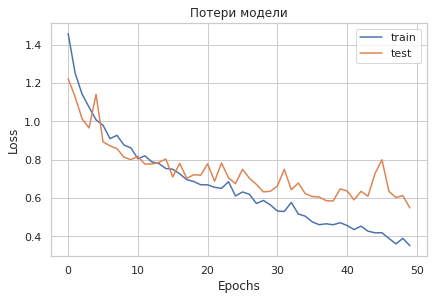

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

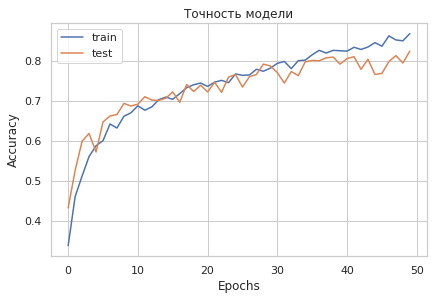

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

####Проверка работы модели

In [ ]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [ ]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

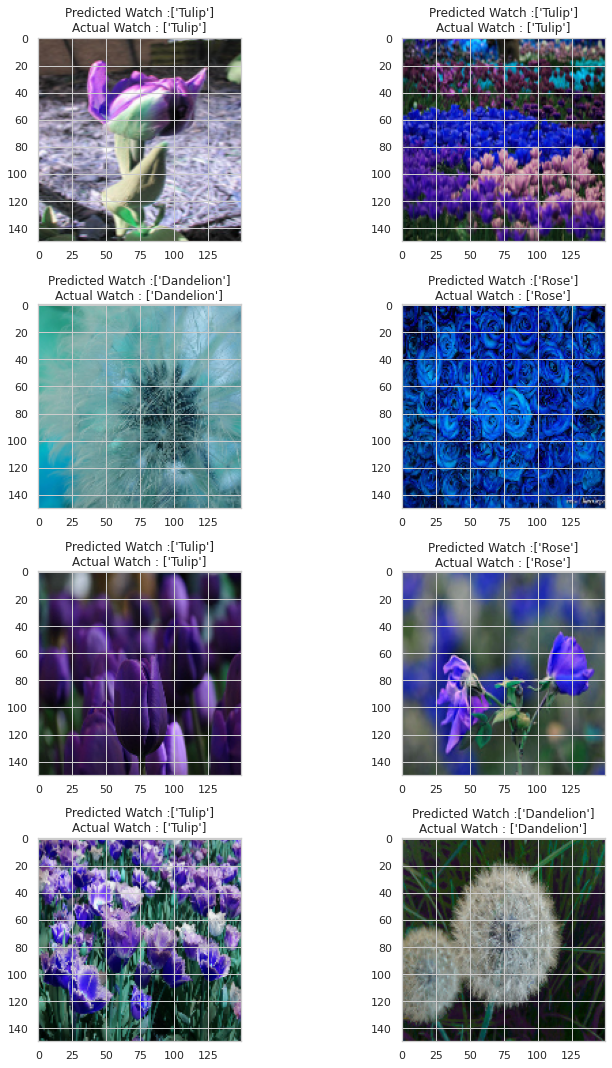

In [ ]:
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Watch :"+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Watch : "+str(le.inverse_transform([np.argmax(y_test[prop_class[count]])])))
        plt.tight_layout()
        count+=1

#### Сохранение модели

In [ ]:
model.save('/content/drive/MyDrive/modelFlowers')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/modelFlowers/assets
